The purpose of this workbook is to investigate what crimes are prevalent in certain areas, which includes, but not limited to:
- finding the percent of total crimes in each zip code
- breaking up the crimes in fbi_desc and apd_desc and looking where those crimes occur

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/MATH_3439/'
graph_folder = '/content/drive/My Drive/Reducing Austin Crime/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv(drive_dir + 'data/2016_austin_crime.csv')
df

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
0,2.016102e+08,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735.0,19.08,3067322.0,10062796.0
1,2.016106e+08,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701.0,11.00,3114957.0,10070462.0
2,2.016109e+08,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753.0,18.23,3129181.0,10106923.0
3,2.016109e+08,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701.0,11.00,3113643.0,10070357.0
4,2.016110e+08,4.0,SEXUAL ASSAULT W/ OBJECT,Rape,1-Jan-16,NaN,C,10-Mar-16,E,78753.0,18.33,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37456,2.016505e+10,7.0,THEFT,Theft,31-Dec-16,8822 MC CANN DR ...,N,3-Jan-17,B,78757.0,18.17,3117454.0,10109065.0
37457,2.016505e+10,9.0,THEFT,Theft,31-Dec-16,123 W 6TH ST ...,N,3-Jan-17,G,78701.0,11.00,3113924.0,10070794.0
37458,2.016801e+10,1.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,5601 EXETER DR ...,N,16-Jan-17,I,78723.0,21.06,3132812.0,10084356.0
37459,2.016801e+10,3.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,101 HERGOTZ LN ...,N,12-Jan-17,H,78742.0,23.10,3131778.0,10062481.0


#Cleaning Data


In [ ]:
df = df.drop(['GO Primary Key', 'GO Census Tract', 'GO Location'],1)


In [ ]:
df.columns = ['council_district', 'apd_desc', 'fbi_desc', 'report_date', 'clearance_status', 'clearance_date', 'district', 'location_zip', 'x', 'y']
df

,council_district,apd_desc,fbi_desc,report_date,clearance_status,clearance_date,district,location_zip,x,y
0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,C,12-Jan-16,D,78735.0,3067322.0,10062796.0
1,9.0,THEFT,Theft,1-Jan-16,C,4-Jan-16,G,78701.0,3114957.0,10070462.0
2,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,N,3-May-16,E,78753.0,3129181.0,10106923.0
3,9.0,THEFT,Theft,1-Jan-16,N,22-Jan-16,G,78701.0,3113643.0,10070357.0
4,4.0,SEXUAL ASSAULT W/ OBJECT,Rape,1-Jan-16,C,10-Mar-16,E,78753.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
37456,7.0,THEFT,Theft,31-Dec-16,N,3-Jan-17,B,78757.0,3117454.0,10109065.0
37457,9.0,THEFT,Theft,31-Dec-16,N,3-Jan-17,G,78701.0,3113924.0,10070794.0
37458,1.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,N,16-Jan-17,I,78723.0,3132812.0,10084356.0
37459,3.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,N,12-Jan-17,H,78742.0,3131778.0,10062481.0


In [ ]:
for col in df.columns:
  percent = 100 * df[col].isna().sum() / df.shape[0]
  percent = round(percent,2)
  print(f'{col}: {df[col].isna().sum()} ({percent}%) missing values')

council_district: 256 (0.68%) missing values
apd_desc: 0 (0.0%) missing values
fbi_desc: 0 (0.0%) missing values
report_date: 0 (0.0%) missing values
clearance_status: 1719 (4.59%) missing values
clearance_date: 1719 (4.59%) missing values
district: 0 (0.0%) missing values
location_zip: 167 (0.45%) missing values
x: 867 (2.31%) missing values
y: 867 (2.31%) missing values


In [ ]:
df = df.dropna()

In [ ]:
#Check that all rows with missing values were dropped
for col in df.columns:
  percent = 100 * df[col].isna().sum() / df.shape[0]
  percent = round(percent,2)
  print(f'{col}: {df[col].isna().sum()} ({percent}%) missing values')

council_district: 0 (0.0%) missing values
apd_desc: 0 (0.0%) missing values
fbi_desc: 0 (0.0%) missing values
report_date: 0 (0.0%) missing values
clearance_status: 0 (0.0%) missing values
clearance_date: 0 (0.0%) missing values
district: 0 (0.0%) missing values
location_zip: 0 (0.0%) missing values
x: 0 (0.0%) missing values
y: 0 (0.0%) missing values


In [ ]:
#We dropped 5% of the clearance status and 2 percent of x,y coordinates, which is not too bad
#In doing so, we lost an entire fbi_desc (Rape). We will do analysis with this separately
df

,council_district,apd_desc,fbi_desc,report_date,clearance_status,clearance_date,district,location_zip,x,y
0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,C,12-Jan-16,D,78735.0,3067322.0,10062796.0
1,9.0,THEFT,Theft,1-Jan-16,C,4-Jan-16,G,78701.0,3114957.0,10070462.0
2,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,N,3-May-16,E,78753.0,3129181.0,10106923.0
3,9.0,THEFT,Theft,1-Jan-16,N,22-Jan-16,G,78701.0,3113643.0,10070357.0
5,1.0,DEADLY CONDUCT,Agg Assault,1-Jan-16,N,8-Jan-16,C,78724.0,3146947.0,10077985.0
...,...,...,...,...,...,...,...,...,...,...
37456,7.0,THEFT,Theft,31-Dec-16,N,3-Jan-17,B,78757.0,3117454.0,10109065.0
37457,9.0,THEFT,Theft,31-Dec-16,N,3-Jan-17,G,78701.0,3113924.0,10070794.0
37458,1.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,N,16-Jan-17,I,78723.0,3132812.0,10084356.0
37459,3.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,N,12-Jan-17,H,78742.0,3131778.0,10062481.0


In [ ]:
df['apd_desc'] = df['apd_desc'].str.strip()
df['fbi_desc'] = df['fbi_desc'].str.strip()
df['clearance_status'] = df['clearance_status'].str.strip()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#88 might be a typo for district
df['district'].value_counts()

D     5040
E     4403
B     4159
F     4154
I     4065
H     3955
A     3790
C     2646
G     2518
AP     154
88       1
Name: district, dtype: int64

In [ ]:
df.dtypes

council_district    float64
apd_desc             object
fbi_desc             object
report_date          object
clearance_status     object
clearance_date       object
district             object
location_zip        float64
x                   float64
y                   float64
dtype: object

In [ ]:
df['council_district'] = df['council_district'].astype(int)
df['location_zip'] = df['location_zip'].astype(int)
df['x'] = df['x'].astype(int)
df['y'] = df['y'].astype(int)
df.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

council_district     int64
apd_desc            object
fbi_desc            object
report_date         object
clearance_status    object
clearance_date      object
district            object
location_zip         int64
x                    int64
y                    int64
dtype: object

#Percent Crime

In [ ]:
#finds the number or percent of total crimes in a zip code
zip_list = df['location_zip'].unique()
for zip in zip_list:
  percent = df[df['location_zip'] == zip].shape[0]/df.shape[0]
  count = df[df['location_zip'] == zip].shape[0]
  print(f'Zip code {zip} has {percent} of total crimes')


Zip code 78735 has 0.007739716210405618 of total crimes
Zip code 78701 has 0.05627060341120826 of total crimes
Zip code 78753 has 0.08324494768525154 of total crimes
Zip code 78724 has 0.01450480149061201 of total crimes
Zip code 78741 has 0.08946538626917012 of total crimes
Zip code 78704 has 0.06822416511394583 of total crimes
Zip code 78748 has 0.03649132865128279 of total crimes
Zip code 78758 has 0.06538626917013043 of total crimes
Zip code 78744 has 0.05179876737852945 of total crimes
Zip code 78747 has 0.006077110505948115 of total crimes
Zip code 78756 has 0.009172996990110363 of total crimes
Zip code 78759 has 0.032019492618603984 of total crimes
Zip code 78723 has 0.05618460656442597 of total crimes
Zip code 78745 has 0.06042711767235202 of total crimes
Zip code 78749 has 0.021155224308442022 of total crimes
Zip code 78751 has 0.02531173856958578 of total crimes
Zip code 78752 has 0.03523004156514261 of total crimes
Zip code 78731 has 0.014246810950265157 of total crimes
Zip 

###78732
- suburbs
- 75% husband wife family households
- majority of houses range $200,000-750,000
- 19.4% have no college degree

###78737
- 75% husband wife family households
- majority of houses range $200,000-750,000
- 32% do not have college degree
- 9% renters

In [ ]:
df['fbi_desc'].value_counts()

Theft          24845
Burglary        5025
Agg Assault     2086
Auto Theft      1988
Robbery          911
Murder            30
Name: fbi_desc, dtype: int64

# Programs
  - Creating programs that:
    - return a df that has zip and the amount of crimes in that zip
    - create a bar chart with the top 5 counts for zip

In [ ]:
#creates dataframe with two columns 'zip' and 'count', which is how many crimes happened in that zip

def create_df(kind):

  new_df = df[df['apd_desc'] == kind]
  new_list = []
  for zip, group in new_df.groupby('location_zip'):
    count = group['apd_desc'].count()
    new_list.append([zip,count])
  
  list_df = pd.DataFrame(new_list, columns = ['zip', 'count'])

  return list_df

In [ ]:
# creates bar chart with top 5 zip codes in that crime and the percentage for that category
# cannot make the figsize bigger bc when we save it, the graph gets cut off
def bar_chart(c_df, name, category, subcategory, n = 5):
  c_df.nlargest(n, ['count']).plot(kind = 'barh', x = 'zip', y = 'count', title = name)

  x_ax = c_df.nlargest(n,['count'])['count'].tolist()

  total_df = df[df['fbi_desc'] == category]
  subtotal = total_df[total_df['apd_desc'] == subcategory].shape[0]
  for index, value in enumerate(x_ax):
    perc = round(value/subtotal*100,2)
    plt.text(value, index, str(perc) + '%')
  
  plt.tight_layout()

##Here we will be finding the top 5 zip codes in each subsection in terms of count and percentage of that apd_desc

#ZIP Theft

In [ ]:
df['fbi_desc'] = df['fbi_desc'].replace(['Auto Theft'], 'Theft')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['apd_desc'] = df['apd_desc'].replace(['BURGLARY OF VEHICLE','THEFT FROM AUTO', 'THEFT OF LICENSE PLATE', 'THEFT OF AUTO PARTS'], 'AUTO THEFT')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


###Auto Theft

In [ ]:
auto_df = create_df('AUTO THEFT')

NameError: ignored

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FileNotFoundError: ignored

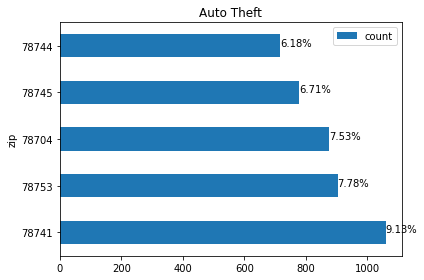

In [ ]:
bar_chart(auto_df, 'Auto Theft', 'Theft', 'AUTO THEFT')
plt.savefig(graph_folder + 'graphs/auto_theft_bar.eps', format = 'eps')

###78741
- Neighbors St. Edward's (east)
- I live in 78741 (university estates)
- Large homeless population
- 72% renters (apts)
- For population over 24, 74% do not have a college degree

###Theft From Person

In [ ]:
person_df = create_df('THEFT FROM PERSON')

In [ ]:
bar_chart(person_df, 'Theft from Person', 'Theft', 'THEFT FROM PERSON')
plt.savefig(graph_folder + 'graphs/person_theft_bar.eps', format = 'eps')

###78701
- Includes downtown and dirty 6th
- 64% singles
- 50% renters
- majority of houses range $200,000-750,000
- 23% no college education

###Bicycle

In [ ]:
bike_df = create_df('THEFT OF BICYCLE')

In [ ]:
bar_chart(bike_df, 'Theft of Bike', 'Theft', 'THEFT OF BICYCLE')
plt.savefig(graph_folder + 'graphs/bike_theft_bar.eps', format = 'eps')

##ZIP Robbery

In [ ]:
df['apd_desc'] = df['apd_desc'].replace(['AGG ROBBERY BY ASSAULT'], 'ROBBERY BY ASSAULT')

###Robbery by Assault

In [ ]:
rob_assault_df = create_df('ROBBERY BY ASSAULT')

In [ ]:
bar_chart(rob_assault_df, 'Robbery by Assault', 'Robbery', 'ROBBERY BY ASSAULT')
plt.savefig(graph_folder + 'graphs/rob_assault_bar.eps', format = 'eps')

###Robbery by Weapon

In [ ]:
rob_weap_df = create_df('AGG ROBBERY/DEADLY WEAPON')

In [ ]:
bar_chart(rob_weap_df, 'Robbery by Weapon', 'Robbery', 'AGG ROBBERY/DEADLY WEAPON')
plt.savefig(graph_folder + 'graphs/rob_weap_bar.eps', format = 'eps')

##ZIP Burglary

###Burglary of Residence

In [ ]:
burg_res_df = create_df('BURGLARY OF RESIDENCE')

In [ ]:
bar_chart(burg_res_df, 'Burglary of Residence', 'Burglary', 'BURGLARY OF RESIDENCE')
plt.savefig(graph_folder + 'graphs/burg_res_bar.eps', format = 'eps')

##ZIP Assault

###Agg Assault

In [ ]:
agg_assault_df = create_df('AGG ASSAULT')

In [ ]:
bar_chart(agg_assault_df, 'Aggravated Assault', 'Agg Assault', 'AGG ASSAULT')
plt.savefig(graph_folder + 'graphs/agg_assault_bar.eps', format = 'eps')

###Agg Assault by Strangle

In [ ]:
agg_assault_strangle_df = create_df('AGG ASLT STRANGLE/SUFFOCATE')

In [ ]:
bar_chart(agg_assault_strangle_df, 'Assault by Strangulation', 'Agg Assault', 'AGG ASLT STRANGLE/SUFFOCATE')
plt.savefig(graph_folder + 'graphs/assault_strangle_bar.eps', format = 'eps')

###Deadly Conduct

In [ ]:
agg_assault_deadly_df = create_df('DEADLY CONDUCT')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


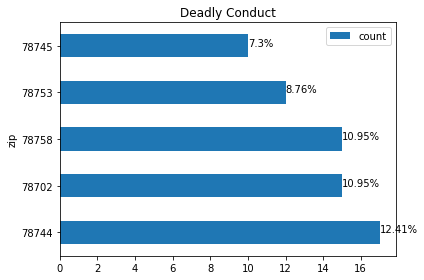

In [ ]:
bar_chart(agg_assault_deadly_df, 'Deadly Conduct', 'Agg Assault', 'DEADLY CONDUCT')
plt.savefig(graph_folder + 'graphs/assault_deadly_bar.eps', format = 'eps')

###Family/Dating Violence

In [ ]:
agg_assault_famdat_df = create_df('AGG ASSAULT FAM/DATE VIOLENCE')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


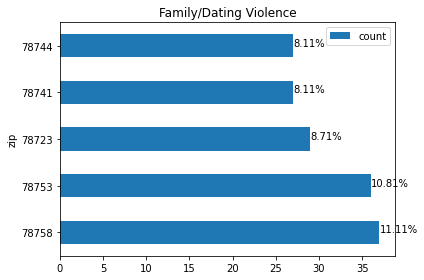

In [ ]:
bar_chart(agg_assault_famdat_df, 'Family/Dating Violence', 'Agg Assault', 'AGG ASSAULT FAM/DATE VIOLENCE')
plt.savefig(graph_folder + 'graphs/assault_famdat_bar.eps', format = 'eps')

#ZIP Murder

In [ ]:
#Not that many points, so we aggregated all murder
df['apd_desc'] = df['apd_desc'].replace(['CAPITAL MURDER','MANSLAUGHTER'], 'MURDER')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


###Murder (APD_Desc)

In [ ]:
df[df['fbi_desc']=='Murder'].shape[0]

30

In [ ]:
murder_df = create_df('MURDER')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


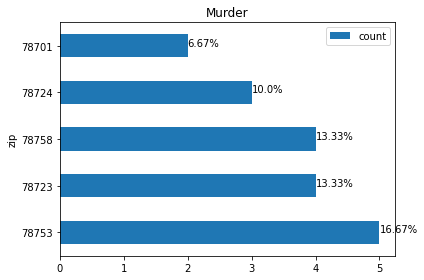

In [ ]:
bar_chart(murder_df, 'Murder', 'Murder', 'MURDER')
plt.savefig(graph_folder + 'graphs/murder_bar.eps', format = 'eps')